# Using UNIX commands for Data Scientsts

## Declare Filename

In [1]:
!ls ./unix

shakespeare.txt


In [2]:
filename = "./unix/shakespeare.txt"
!echo $filename
print(filename)

./unix/shakespeare.txt
./unix/shakespeare.txt


## head


In [3]:
## head gives us the first 3 lines
!head -n 3 $filename

## tail

In [4]:
!tail -n 10 $filename

## wc


In [5]:
!wc $filename

 124505  901447 5583442 ./unix/shakespeare.txt


In [6]:
!wc -l $filename

124505 ./unix/shakespeare.txt


## cat

In [7]:
!cat $filename | wc -l

124505


##  grep

In [8]:
!grep -i 'parchment' $filename

In [9]:
# output matching pattern one per line and then count no. of lines

!cat $filename | grep -o 'liberty' | wc -l

71


since we have used ```-o``` option we did not see the full line instead we see liberty as the word in ```grep -o 'liberty'``` 

## sed

In [10]:
!grep -i 'parchment' $filename | wc -l

8


In [11]:
# replace all instances of 'parchement' to manuscript

!sed -e 's/parchment/manuscript/g' $filename > temp.txt

```g``` refers to globally

In [12]:
!grep -i 'manuscript' temp.txt

In [13]:
!grep -i 'manuscript' temp.txt | wc -l

8


## Sort

In [23]:
!head -n 5 $filename | sort

```head``` gives first 5 lines of the file and if we sort those 5 lines; ```sort``` will put them in ascending character orders, based on ASCII numbers.
Often Data files are comma or space separated and let's say we wish to sort on the basis of the second column.

In [15]:
# Columns separated by ' ', sort on column 2 (-k2), case insensitive (-f)
!head -n 5 $filename | sort -f -t' ' -k2

Now, ```presented, of, releases, is``` are in correct order; i.e. the second word of each line.

In [16]:
!sort $filename | wc -l

124505


In [17]:
# uniq command for getting unique records using -u option
!sort $filename | uniq -u | wc -l

110834


# Let's Bring it all together

## Count most frequent words in the text in unix

In [18]:
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -15

 502289 $
  22678 the$
  19163 I$
  17868 and$
  15324 to$
  15216 of$

  12152 a$
  10614 my$
   9347 in$
   8709 you$
   7662 is$
   7332 that$
   7065 And$
   6737 not$
sort: write failed: 'standard output': Broken pipe
sort: write error


In [19]:
!sed 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr|head -15> count_vs_words.txt

sort: write failed: 'standard output': Broken pipe
sort: write error


In [20]:
!cat count_vs_words.txt

 502289 $
  22678 the$
  19163 I$
  17868 and$
  15324 to$
  15216 of$

  12152 a$
  10614 my$
   9347 in$
   8709 you$
   7662 is$
   7332 that$
   7065 And$
   6737 not$


## Plot by importing word counts into Python

In [21]:
%matplotlib inline

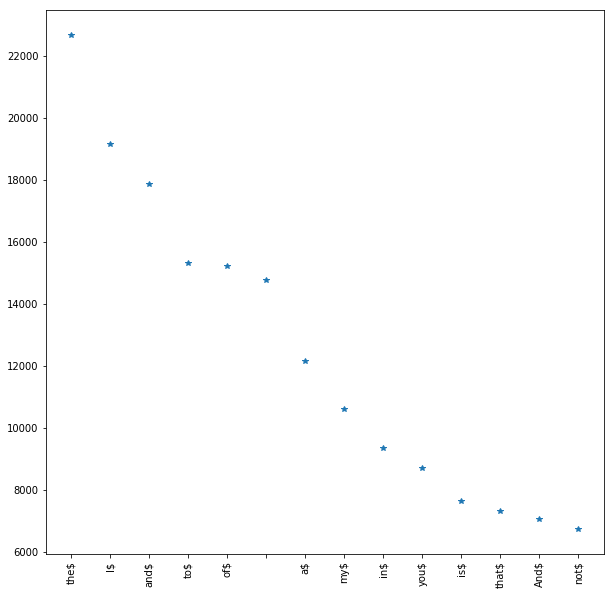

In [22]:
import matplotlib.pyplot as plt
import csv

xTicks=[]
y=[]

with open('count_vs_words.txt', 'r') as csv_file:
    plots = csv.reader(csv_file, delimiter=' ')
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))

# remove the count of spaces (first line)
y = y[1:]
xTicks = xTicks[1:]

# Plot
x=range(len(y))
plt.figure(figsize=(10,10))
plt.xticks(x,xTicks, rotation=90) #xlabel with 90 degrees angle
plt.plot(x,y,'*')
plt.show()
